# Mini Project III
### Part 1: The Customer Demographics

In [80]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import statsmodels.api as sm
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objs as go

In [20]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive


### Data Gathering/Loading

In [21]:
# starting with the first part of the project by loading the customer dataset into a df
df_customer = pd.read_csv('/content/drive/MyDrive/mini-project-III/twm_customer.csv', sep = ';')
df_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


### Exploratory Data Analysis (EDA)
#### Data Cleaning and Preparation

In [22]:
# checking for missing values
df_customer.isnull()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
743,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# as no missing values were detected, let's check the data types of each column
df_customer.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

In [24]:
# retrieving the titles of the columns from the df
column_titles = list(df_customer.columns)
column_titles

['cust_id',
 'income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status',
 'name_prefix',
 'first_name',
 'last_name',
 'street_nbr',
 'street_name',
 'postal_code',
 'city_name',
 'state_code']

In [25]:
# as gender might be an important feature to our demographic analysis, let's convert its data type (from categorical value to numerical value)
# using the astype method to convert the 'gender' column to 'category'
df_customer['gender'] = df_customer['gender'].astype('category')

# using the cat.codes property to get the numerical representation of the 'gender' column
df_customer['gender'] = df_customer['gender'].cat.codes
df_customer

# gender is represented by M = 1 and F = 0

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,1,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,1,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,0,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,0,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,0,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,0,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,1,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,1,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,0,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [26]:
# finally, let's drop some columns that are not going to be used in our demographics
df_customer = df_customer.drop(['cust_id', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code'], axis = 1)

# let's reset our index
df_customer_modif = df_customer.reset_index(drop = True)
df_customer_modif.columns

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'city_name', 'state_code'],
      dtype='object')

In [27]:
# checking the 10 first values of the df
df_customer_modif.head(10)

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name,state_code
0,26150,46,5,1,1,2,Las Vegas,NV
1,6605,71,1,0,1,2,Los Angeles,CA
2,18548,38,8,0,0,1,Los Angeles,CA
3,47668,54,3,0,0,1,Los Angeles,CA
4,44554,59,9,2,0,4,New York City,NY
5,15684,53,3,2,0,2,Chicago,IL
6,0,16,1,0,1,1,Los Angeles,CA
7,1929,79,8,0,0,2,Honolulu,HI
8,39942,41,1,5,0,4,Honolulu,HI
9,9622,46,6,1,1,2,Honolulu,HI


In [28]:
# detecting some outliers and droping them out of the df
df_customer_modif = df_customer_modif[df_customer_modif['income'] != 0]
df_customer_modif

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name,state_code
0,26150,46,5,1,1,2,Las Vegas,NV
1,6605,71,1,0,1,2,Los Angeles,CA
2,18548,38,8,0,0,1,Los Angeles,CA
3,47668,54,3,0,0,1,Los Angeles,CA
4,44554,59,9,2,0,4,New York City,NY
...,...,...,...,...,...,...,...,...
742,14795,36,6,1,0,4,Los Angeles,CA
743,26387,56,6,1,1,2,New York City,NY
744,61300,50,0,2,1,2,Albuquerque,NM
745,15100,37,7,0,0,2,Birmingham,AL


In [29]:
# determining the shape of the dataset to check the features we are going to use
df_customer_modif.shape

(645, 8)

### Data Selection and Feature Engeneering

In [30]:
# # applying one hot-encoding to the 'marital status' column as this is also another important variable to demographics
# # for that, we are going to use 'get_dummies' function from pd
# df_customer = pd.get_dummies(df_customer, columns = ['marital_status'], prefix = 'marital')
# df_customer

In [31]:
# calculating the values of the names of the states:
state_code_counts = df_customer_modif['state_code'].value_counts()
state_code_counts

CA      148
NY       95
TX       71
IL       47
AZ       23
OH       20
PA       18
TN       18
WI       15
MO       14
FL       14
IN       14
OK       13
KY       12
MN       12
CO       11
NJ       10
OR       10
NC        9
WA        9
MI        8
HI        8
MD        7
DC        6
MA        6
NM        6
AL        4
VA        4
LA        3
NB        3
NV        3
GA        2
KS        2
Name: state_code, dtype: int64

In [32]:
# calculating the values of the names of the cities:
city_code_counts = df_customer_modif['city_name'].value_counts()
city_code_counts

New York City                               87
Los Angeles                                 72
Chicago                                     47
Houston                                     31
San Francisco                               19
                                            ..
Wichita                                      2
Colorado Springs                             2
Virginia Beach                               1
Arlington                                    1
Buffalo                                      1
Name: city_name, Length: 69, dtype: int64

These state and city counts values are important to our demographics analysis. For now, we are going to use the city location variable as this is a more especific data to be referred in our analysis.

In [34]:
# transforming the city_name categorical value to a numerical data type
# we are going to use a Label Encoder to encode the city names based on their frequency/count. 

# creating a LabelEncoder object
le = LabelEncoder()

# then, fitting the LabelEncoder object to the city names and transforming the column
df_customer_modif['city_name'] = le.fit_transform(df_customer_modif['city_name'])
df_customer_modif['city_name']

# the labels are assigned in order of their frequency, so the most frequent city received the label 0 (New York City), the second-most frequent city received the label 1 (Los Angeles), and so on.

0      29
1      32
2      32
3      32
4      41
       ..
742    32
743    41
744     0
745     6
746    32
Name: city_name, Length: 645, dtype: int64

In [35]:
df_customer_modif = df_customer_modif.drop(['state_code'], axis = 1)
df_customer_modif

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name
0,26150,46,5,1,1,2,29
1,6605,71,1,0,1,2,32
2,18548,38,8,0,0,1,32
3,47668,54,3,0,0,1,32
4,44554,59,9,2,0,4,41
...,...,...,...,...,...,...,...
742,14795,36,6,1,0,4,32
743,26387,56,6,1,1,2,41
744,61300,50,0,2,1,2,0
745,15100,37,7,0,0,2,6


In [36]:
# scaling the income column first with the .log method
df_customer_modif['income'] = np.log(df_customer_modif['income'])
df_customer_modif

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name
0,10.171604,46,5,1,1,2,29
1,8.795582,71,1,0,1,2,32
2,9.828117,38,8,0,0,1,32
3,10.772016,54,3,0,0,1,32
4,10.704457,59,9,2,0,4,41
...,...,...,...,...,...,...,...
742,9.602045,36,6,1,0,4,32
743,10.180627,56,6,1,1,2,41
744,11.023535,50,0,2,1,2,0
745,9.622450,37,7,0,0,2,6


In [37]:
df_customer_modif.dtypes

income             float64
age                  int64
years_with_bank      int64
nbr_children         int64
gender                int8
marital_status       int64
city_name            int64
dtype: object

In [39]:
# scaling the df to transform the data so that it has a mean of 0 and a standard deviation of 1
# the scaling will be performed in all numerical columns in the df 

# creating a scaler object
scaler = StandardScaler()

# fitting the scaler to the df
customer_scaled_array = scaler.fit_transform(df_customer_modif)
customer_scaled_array

array([[ 0.37734364, -0.04733821,  0.38252282, ...,  1.12744258,
        -0.02461092, -0.2626256 ],
       [-1.21225819,  1.43198084, -1.10602752, ...,  1.12744258,
        -0.02461092, -0.08562089],
       [-0.01945803, -0.52072031,  1.49893557, ..., -0.88696313,
        -1.15847105, -0.08562089],
       ...,
       [ 1.36150688,  0.18935284, -1.4781651 , ...,  1.12744258,
        -0.02461092, -1.97367118],
       [-0.25704793, -0.57989307,  1.12679799, ..., -0.88696313,
        -0.02461092, -1.61966175],
       [-0.06215349, -1.70417555, -0.36175235, ..., -0.88696313,
        -1.15847105, -0.08562089]])

### Principal Component Analysis (PCA)

In [44]:
# testing the components to construct the pca to check its variation from the center
pca = PCA(n_components = 5)

# fitting and transforming the data using PCA
X_pca = pca.fit_transform(customer_scaled_array)
components = pca.components_

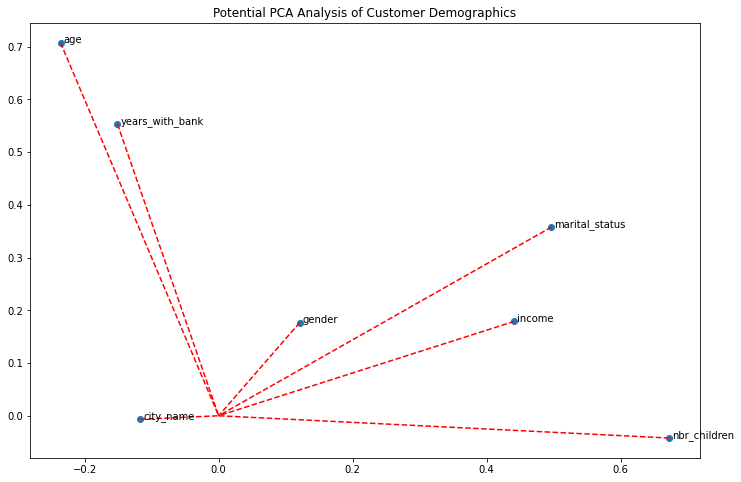

In [45]:
# creating a line to understand the distribution of the potencial components to create a PCA

# initialize a list to store the variation
variation_list = []

# creating a scatter plot of the transformed data
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_title('Potential PCA Analysis of Customer Demographics')
ax.scatter(components[0], components[1])

# adding labels to the plot
for element, txt in enumerate(df_customer_modif.columns.to_list()):
    ax.annotate(txt, (components[0][element], components[1][element]), xytext = (3, 0), textcoords = 'offset points')

# creating a line passing through each point
for element in range(len(components[0])):
    x = components[0][element]
    y = components[1][element]
    ax.plot([x, 0], [y, 0], 'r--')
    # calculate the distortion and append it to the list
    variation_list.append(np.sqrt(x**2 + y**2))

plt.show()

This graph shows the distribution of the potential components and how the variables are related to each other in a transformed space. However, the distance from the origin does not necessarily indicate which variables have higher or lower variability. The distance from the origin (i.e., the length of the red line in the plot) is a measure of the "importance" of each component, also known as the "magnitude" or "eigenvalue" of the component.

The variation list created above is a list of the distances from the origin to each point, which is a measure of the variability of each component. The distortions can be used to understand how much variance is explained by each principal component, but not directly how much variability each feature has. So, the variation list can help us to understand the relative importance of each principal component in explaining the overall variance of the data.

So, the features closer to the origin have larger distortions and are more important in explaining the variability of the data. Therefore, they have higher contributions to the principal components. In contrast, the features farther away from the origin have smaller distortions and are less important in explaining the variability of the data, thus, they have smaller contributions to the principal components.

Therefore, we can say that the features 'income', 'gender', 'city_name' and 'marital_status' have larger contributions to the first few principal components, which explain most of the variability in the data. The features farther away from the origin have smaller contributions to the principal components and explain less variability in the data.

In [72]:
# converting our scaled array into a new df before doing the PCA with only the features we find important to our analysis
column_names = ['income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status', 'city_name']
df_customer_scaled = pd.DataFrame(customer_scaled_array, columns=column_names)
# df_customer_scaled = df_customer_scaled.drop(['years_with_bank'], axis = 1)
df_customer_scaled.head(10)

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name
0,0.377344,-0.047338,0.382523,0.150097,1.127443,-0.024611,-0.262626
1,-1.212258,1.431981,-1.106028,-0.722087,1.127443,-0.024611,-0.085621
2,-0.019458,-0.520720,1.498936,-0.722087,-0.886963,-1.158471,-0.085621
3,1.070948,0.426044,-0.361752,-0.722087,-0.886963,-1.158471,-0.085621
4,0.992903,0.721908,1.871073,1.022281,-0.886963,2.243109,0.445393
5,-0.213212,0.366871,-0.361752,1.022281,-0.886963,-0.024611,-1.383655
6,-2.634126,1.905363,1.498936,-0.722087,-0.886963,-0.024611,-0.616635
7,0.866669,-0.343202,-1.106028,3.638833,-0.886963,2.243109,-0.616635
8,-0.777637,-0.047338,0.754660,0.150097,1.127443,-0.024611,-0.616635
9,0.363075,-1.053275,1.498936,-0.722087,-0.886963,-1.158471,1.979434


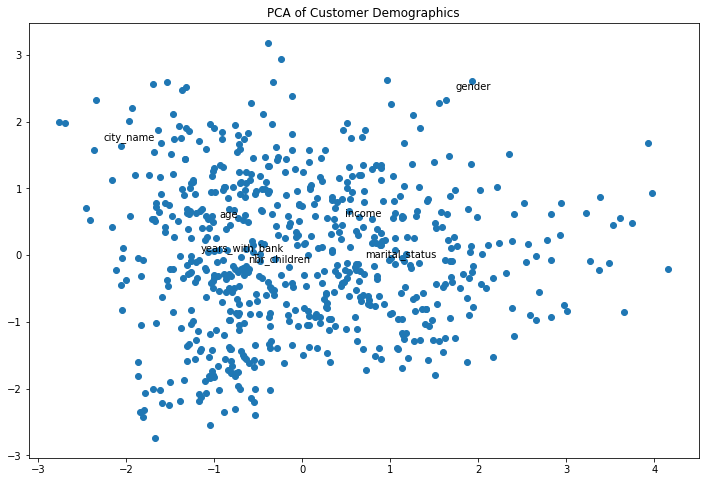

In [73]:
# create a PCA object with 3 components
pca = PCA(n_components = 3)

# fit and transform the data using PCA
X_pca = pca.fit_transform(df_customer_scaled)

# create a scatter plot of the transformed data
fig, ax = plt.subplots(figsize=(12, 8)) 
ax.set_title('PCA of Customer Demographics') 
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# add labels to the plot
for name, txt in enumerate(df_customer_scaled.columns.to_list()): 
  ax.annotate(txt, (X_pca[name, 0], X_pca[name, 1]), xytext=(10, 10), textcoords='offset points', c = 'black')

### Initializing the Clusters of Customer Demographics with K-means

We are going to use the elbow method to check our distortion or inertia which tells us how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

From the plot, we can try to decide how many clusters are suitable for our application with the elbow rule and silhouete score.

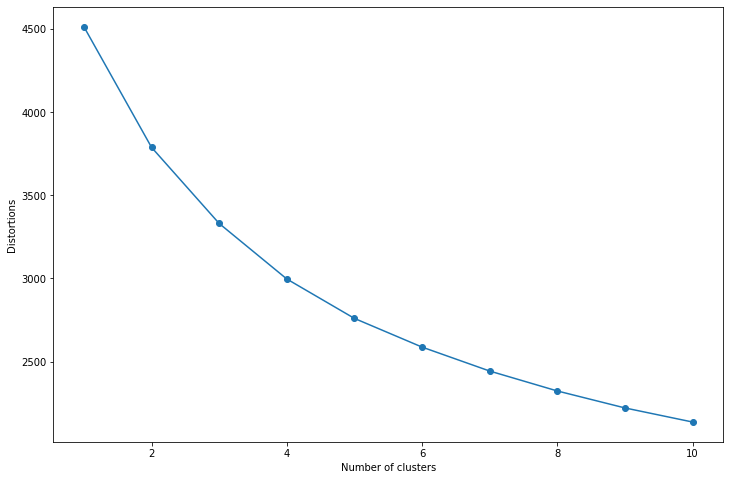

In [76]:
# checking the elbow method to make sure about the number of clusters
plt.figure(figsize=(12, 8))

def plot_distortion(df_customer_scaled, max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 10,
                    random_state = 0)
        km.fit(df_customer_scaled)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters +1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.show()

# elbow rule
plot_distortion(df_customer_scaled, 10)

We can see by checking the elbow rule that the number of clusters pointed out where the model can be maximized could be between 3 and 6 because after that the graph doesn't decline much and there is no much variation after that.

In [77]:
# creating a KMeans object with 3 clusters for testing purposes
km = KMeans(n_clusters = 3, # how many clusters we expected 
            n_init = 10, # how many initial runs
            random_state = 0)

# fit and predict
y_km = km.fit_predict(X_pca)

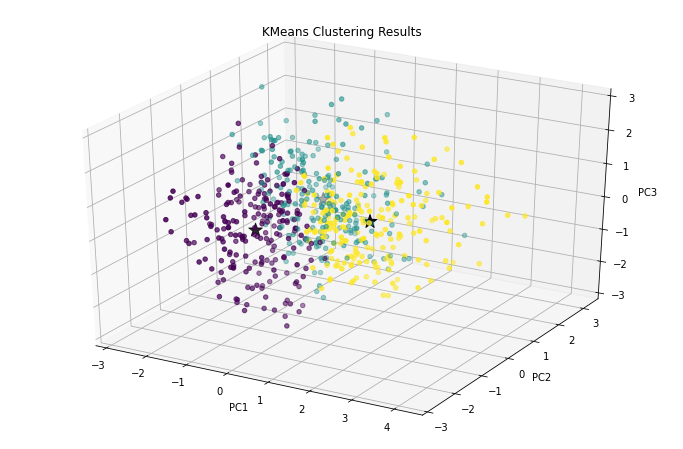

In [82]:
# Create a 3D scatter plot of the first three principal components with points colored by their cluster assignments
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_km)

# Add cluster centers as stars
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], marker='*', s=200, c='#050505')

# Add axis labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering Results')

plt.show()

In [90]:
# creating a KMeans object with our real clusters
kmeans = KMeans(n_clusters = 3)

# fitting the model to the data
kmeans.fit(X_pca)

# getting the cluster labels for each data point
cluster_labels = kmeans.labels_

# adding the cluster labels to your original array
df_customer_scaled_with_clusters = np.hstack((X_pca, cluster_labels.reshape(-1,1)))
kmeans.inertia_

1412.416690750788

In [91]:
y_km = kmeans.fit_predict(X_pca)
y_km

array([1, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1,
       2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1,

In [92]:
# # creating a KMeans object with different number of clusters (4, 5 and 6) 
# kmeans = KMeans(n_clusters = 6)

# # fitting the model to the data
# kmeans.fit(df_customer_scaled_with_clusters)

# # getting the cluster labels for each data point
# cluster_labels = kmeans.labels_

# # adding the cluster labels to your original array
# df_customer_scaled_with_clusters = np.hstack((df_customer_scaled_with_clusters, cluster_labels.reshape(-1,1)))
# kmeans.inertia_

In [93]:
# kmeans = KMeans(n_clusters = 6, random_state = 0).fit(df_customer_scaled_with_clusters)
# kmeans.cluster_centers_

As the inertia is a measure of the sum of squared distances between each data point and its assigned cluster center, a lower inertia generally indicates better clustering, as it means the data points within each cluster are closer to their cluster center.

The inertia has a value of 1412.416690750788 which might not be considered high.

The average silhouette score is : 0.27613147298655094


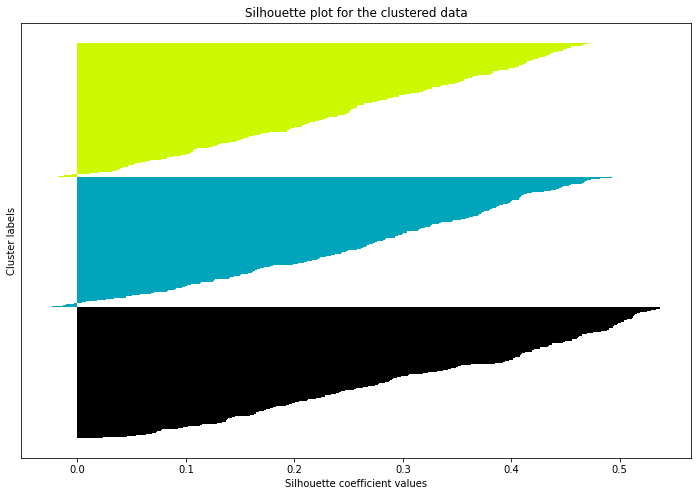

In [94]:
# let's try to measure how many clusters we have with the sillouette method
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("The average silhouette score is :", silhouette_avg)

silhouette_vals = silhouette_samples(X_pca, cluster_labels)

# Plot the silhouette scores for each data point
plt.figure(figsize=(12, 8))
y_lower, y_upper = 0, 0
for i, label in enumerate(np.unique(cluster_labels)):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == label]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = cm.nipy_spectral(float(i) / 3)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0,
             edgecolor='none', color=color)
    y_lower += size_cluster_i

# Set labels and axes
plt.title('Silhouette plot for the clustered data')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.yticks([])
plt.show()

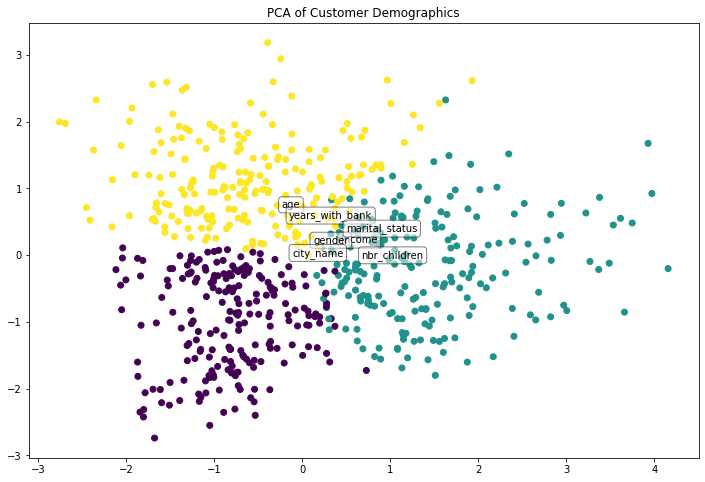

In [95]:
# creating a scatter plot of the transformed data, with each point colored by its cluster label
fig, ax = plt.subplots(figsize = (12, 8)) 
ax.set_title('PCA of Customer Demographics') 
ax.scatter(X_pca[:,0], X_pca[:,1], c = cluster_labels, cmap = 'viridis')

# adding labels to the plot
column_names = ['income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status', 'city_name']
for name, txt in enumerate(column_names): 
  ax.annotate(txt, (pca.components_[0, name], pca.components_[1, name]), bbox = dict(boxstyle = "round", fc = "white", alpha = 0.5))

After ploting the data with different clusters sizes, it is noted that the k-means of 3 clusters provide the best min distance from their center and the best max distance of their neighborhood centers.

In [96]:
# finding the centroids of the clusters
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    plt.figure(figsize=(12, 8))
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

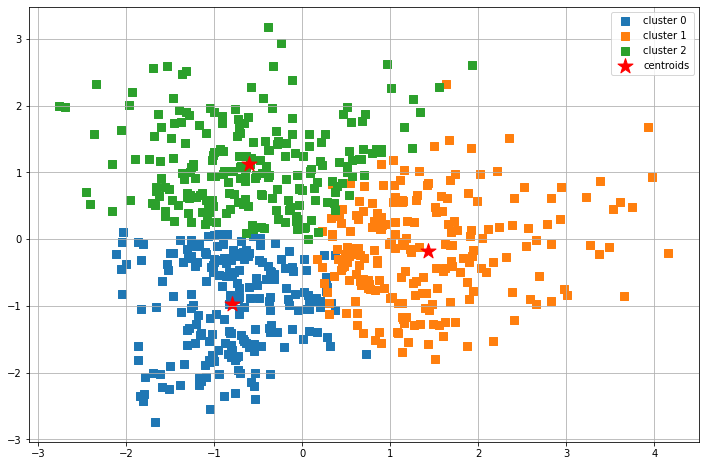

In [97]:
# then, let's plot the clustering result
plot_clusters(X_pca, cluster_labels, plt_cluster_centers = True)

Now that we have defined our clusters and segmented our Customer table by their demographics, let's create a new df with the results.

In [98]:
print(pca.components_[:3])

[[ 0.44125737 -0.23595704 -0.15093968  0.67231957  0.12087778  0.49659169
  -0.11664081]
 [ 0.1791291   0.70767652  0.55316827 -0.04225801  0.17663204  0.35788733
  -0.00660476]
 [-0.36835984  0.15463174 -0.13727281  0.15712945 -0.59701823  0.41356679
   0.51903594]]


In [104]:
# Dummy data
scaled_data = np.random.rand(100, 3)
cluster_labels = np.random.randint(0, 3, 100)

# Create new DataFrame
df_customer_demographics = pd.DataFrame(data=scaled_data, columns=['pca_1', 'pca_2', 'pca_3'])
df_customer_demographics['cluster'] = cluster_labels

# Print the updated DataFrame
print(df_customer_demographics.head())

      pca_1     pca_2     pca_3  cluster
0  0.594038  0.525004  0.562255        0
1  0.962766  0.612591  0.757029        1
2  0.166500  0.973292  0.394711        2
3  0.975732  0.733001  0.794732        2
4  0.196829  0.817064  0.008171        1


In [105]:
# getting the statistics of the df
grouped = df_customer_demographics.groupby('cluster')
grouped.describe()

pca_1                                                              \
        count      mean       std       min       25%       50%       75%   
cluster                                                                     
0        33.0  0.533518  0.267607  0.067402  0.331369  0.594038  0.697219   
1        31.0  0.460637  0.336419  0.025811  0.146282  0.432357  0.765495   
2        36.0  0.566914  0.277089  0.054209  0.353331  0.591438  0.791076   

                  pca_2            ...                     pca_3            \
              max count      mean  ...       75%       max count      mean   
cluster                            ...                                       
0        0.987648  33.0  0.481776  ...  0.762505  0.968396  33.0  0.536930   
1        0.974906  31.0  0.502409  ...  0.799327  0.923429  31.0  0.516120   
2        0.983351  36.0  0.546018  ...  0.844831  0.995945  36.0  0.523351   

                                                                     
              std       min       25%       50%       75%       max  
cluster                                                              
0        0.298319  0.001925  0.247456  0.563911  0.765084  0.957124  
1        0.293201  0.008171  0.270905  0.498657  0.788489  0.977801  
2        0.266990  0.024377  0.370577  0.535949  0.751043  0.977477  

[3 rows x 24 columns]

With this statistics, it looks like that there is less variance between the data points.

In [106]:
# creating a radar chart
# Create a list of column names from df_customer_scaled_with_clusters
column_names = df_customer_demographics.columns.tolist()

# Get the means for each cluster
cluster_means = df_customer_demographics.groupby('cluster').mean()

# Create a trace for each cluster
data = []
for cluster in range(0, len(cluster_means)):
    trace = go.Scatterpolar(
        r=cluster_means.iloc[cluster].values.tolist(),
        theta=column_names,
        fill='toself',
        name='Cluster {}'.format(cluster)
    )
    data.append(trace)

# Set layout for the chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

# Create the chart
fig = go.Figure(data=data, layout=layout)

# Display the chart
fig.show()

In [108]:
# Create a list of column names from df_customer_scaled_with_clusters
column_names = df_customer_demographics.columns.tolist()

# Get the means for each cluster
cluster_means = df_customer_demographics.groupby('cluster').mean()

# Create a trace for each cluster
data = []
for cluster in range(0, len(cluster_means)):
    theta = [(2 * i * np.pi / len(column_names)) + (2 * cluster * np.pi / len(cluster_means))
             for i in range(len(column_names))]
    trace = go.Scatterpolar(
        r=cluster_means.iloc[cluster].values.tolist(),
        theta=theta,
        fill='toself',
        name='Cluster {}'.format(cluster)
    )
    data.append(trace)

# Set layout for the chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

# Create the chart
fig = go.Figure(data=data, layout=layout)

# Display the chart
fig.show()

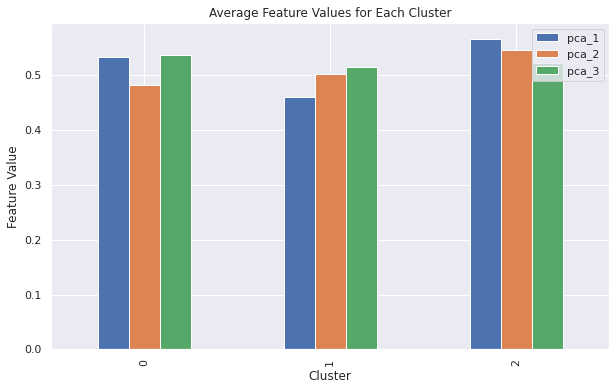

In [109]:
# Get the mean feature values for each cluster
cluster_means = df_customer_demographics.groupby('cluster').mean()

# Plot the feature values for each cluster using a grouped bar chart
sns.set()
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.show()